# Bio 302 Homework 3

There are two parts to this homework, some python work and some problems from the textbook.

**Part 1: Python**

Complete the python/exploration problems in this notebook. Please solve them in the indicated space, and ensure that your solutions pass all supplied tests.

**Part 2: Textbook**

Read Chapter 3 up to page 96; that's where the section on alignment algorithms starts.

Chapter 3 Discussion Questions: 3-2, 3-3

**Submission**

Submit your solutions as a link to a Gist via a Slack DM. You are welcome to compose your solutions to the textbook problems in a word-processing program, although you may also simply use this python notebook. If you do end up with multiple files, please ensure that you add all of them in a single Gist, rather than creating multiple Gists. (To add files to a Gist, look for the "Add File" button in the lower left.)

In [13]:
# -- Some standard imports for the plotting package matplotlib,
#    and some setup. You'll want to leave these as is.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12.0, 8.0]

## Problem 1

Write a function called `print_gc_contents` that
takes one argument, the name of a valid fasta file
whose header lines follow the template `>species,gene,url`. So an example header line might be `'>chimp,BRCA1,http://chimp.genomics.io/brca1'`. For each sequence in the file, print out one line
containing the species name, a space, and then the
proportion of nucleotides in the sequence that are G's
or C's, i.e. the GC content.


In [14]:
def read_fasta_file(filename):
    contents = open(filename).read()
    out = []
    for seqrec in contents.split('>'):
        if not seqrec:
            continue
        lines = seqrec.split('\n')
        header = lines[0]
        seq = ''.join(lines[1:])
        out.append(dict(header=header, sequence=seq))
    return out
def print_gc_contents(fname):
    contents = read_fasta_file(fname)
    for seq in contents:
        header = seq['header'].split(',')
        gc_count = seq['sequence'].count('G') + seq['sequence'].count('C')
        total = gc_count + seq['sequence'].count('A') + seq['sequence'].count('T')
        print(header[0] + ' ' + str(gc_count / total))
print_gc_contents('example.fasta')

martian 0.6352558895207149
unicorn 0.7049019607843138


### Testing

A file called `example.fasta` has been provided. Here's the output of a session run with a correct implemention of `print_gc_contents`:

```
In [1]: print_gc_contents('example.fasta')
martian 0.635255889521
unicorn 0.704901960784
```

Your implementation should give precisely the same results.

## Problem 2

Write a function called `dot_plot` that
produces a [dot plot](http://en.wikipedia.org/wiki/Dot_plot_%28bioinformatics%29).

A dot plot lets you examine two DNA or protein
sequences for similarity. The plot is conceptually an
m-by-n grid of cells, for sequence 1 of length m, and
sequence 2 of length n. If a window of radius r about
position i in sequence 1 is identical to a window of
radius r about position j in sequence 2, then a dot is
plotted in the grid. If they're not identical, nothing
is plotted.

A 'window' is a region of consecutive nucleotides
around some focal nucleotide. Say I had the DNA
sequence 'ACATTAG'. Assume that my focal nucleotide is
the first 'T'. The window of radius 1 about that 'T'
is 'ATT'. The window of radius 2 about that 'T', is
'CATTA'. The window of radius 3 about the 'T' is
'ACATTAG', three nucleotides on either side. Observe
that, in python, if i is the index of my focal
nucleotide, let's assume it's in a variable 'sequence'
of string type, then a window of radius r is given by
'sequence[i - r:i + r + 1]'.

The grid description above suggests an algorithm. In
English, for all possible pairs of residues in
sequence 1 and sequence 2, check to see whether the
windows surrounding the residues are identical. If
they are, add an ordered pair to be plotted. If
they're not, do nothing.

And in pseudocode:

```python
points_to_plot = []
for i in range(len(sequence1)):
    for j in range(len(sequence2)):
       if window(sequence1, i, r) == window(sequence2, i, r):
           points_to_plot.append((i, j))
```

Then you'd plot 'points_to_plot', in matplotlib
please. You'd want to suppress the drawing of lines
between the points, or you'll get a mess.

Your function should accept three
arguments. The arguments, in order, are:

`fasta_file1 fasta_file2 window_radius`

The program operates to make a dot plot, using the
first sequence encountered in fasta_file1 on the
x-axis, and the first sequence encountered in
fasta_file2 on the y-axis.

The window radius should be an integer greater than or
equal to zero. A window of radius zero means that
you're comparing the residues directly, with no
surrounding nucleotides.

Your program should cause a dot plot to be shown in the notebook.

Your program should label the axes with up to the
first 30 characters of the header line. Do whatever
you like with the plot title and the plot
styling/colors.

In [19]:
def index_sequence(seq, radius):
    # Build an index of the locations of all subseqs of `seq` with given radius.
    index = {}
    for ix in range(radius, len(seq) - radius):
        subseq = seq[ix - radius:ix + radius + 1]
        if subseq in index:
            index[subseq].append(ix)
        else:
            index[subseq] = [ix]
    return index

test_seq = 'GATTACA' * 4
index_sequence(test_seq, 1)

{'ACA': [5, 12, 19, 26],
 'AGA': [7, 14, 21],
 'ATT': [2, 9, 16, 23],
 'CAG': [6, 13, 20],
 'GAT': [1, 8, 15, 22],
 'TAC': [4, 11, 18, 25],
 'TTA': [3, 10, 17, 24]}

In [15]:
def window(sequence, index, radius):
    window = sequence[(index-radius):(index+radius+1)]
    return window

def dot_plot(fasta_file1,fasta_file2,window_radius):
    fasta1 = read_fasta_file(fasta_file1)
    fasta2 = read_fasta_file(fasta_file2)
    xlab = fasta1[0]['header'][:30]
    ylab = fasta2[0]['header'][:30]
    seq1 = fasta1[0]['sequence']
    seq2 = fasta2[0]['sequence']
    points = []
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if window(seq1, i, 3) == window(seq2, j, 3):
                points.append((i, j))
    plt.scatter(*zip(*points), s=1, color='0', lw = 0)
    axlimit = max(max(points)[0]+100,max(points)[1]+100)
    plt.axis([0,axlimit,0,axlimit])
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    plt.show()


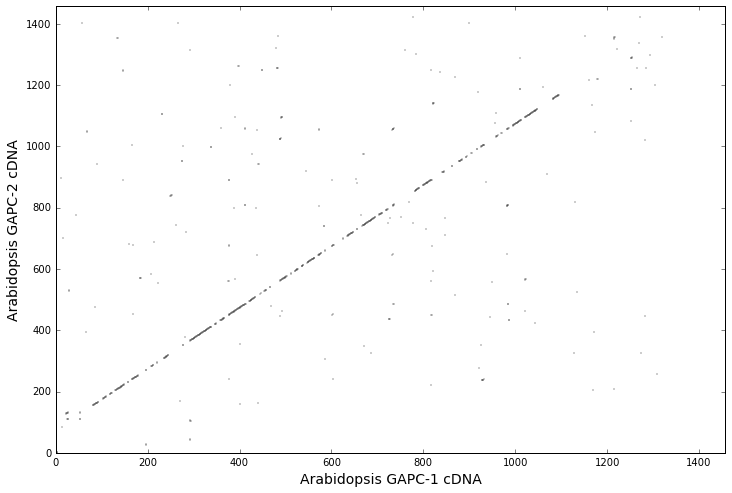

In [16]:
dot_plot('gapc1.fasta','gapc2.fasta',3)

### Testing

This is example output from a correctly-implemented `dot_plot('gapc1.fasta', 'gapc2.fasta', 3)`. The example fasta-format files `gapc1.fasta` and `gapc2.fasta` have been provided in the repository.

![](./gapc1_v_gapc2_dotplot.png)

## Problem 3

Grab the 'full length genomic' GAPC-1 sequence from
the following page:

 http://www.arabidopsis.org/servlets/TairObject?id=41963&type=gene

This is TAIR, a site that specializes in Arabidopsis
sequences, kind of like how Santa Cruz specializes in
human sequences.

Massage the sequence into a valid FASTA file,
`gapc1-genomic.fasta`. You might want to use the
search-and-replace function of your editor. Be sure to
include your FASTA file in your assignment submission.

Make a dot plot with the genomic DNA on the x-axis and
the cDNA (from the example file `gapc1.fasta`) on the y-axis. Try a few
different radii and choose one that you like. Defend your choice.

Then, explain the patterns you see in the dot plot.

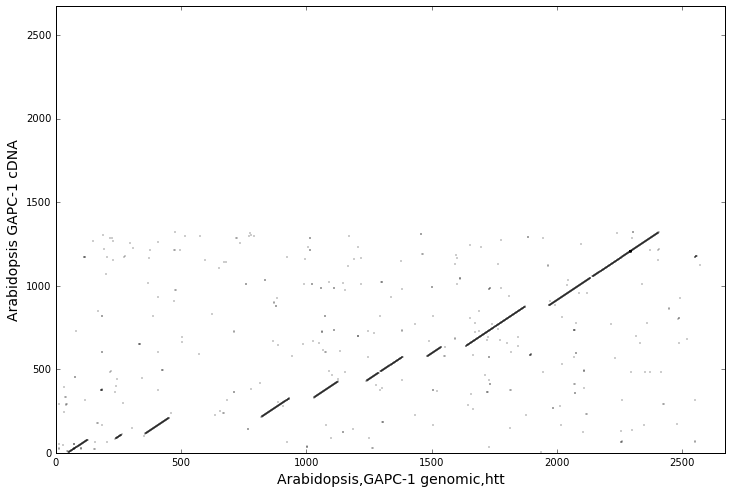

In [144]:
dot_plot('gapc1-genome.fasta','gapc1.fasta',5)

In this comparison, the sequences compared are different lengths. The fact that the cDNA is shorter and that the line is shifted to the right in multiple spots points to deletions in the gene.

## Problem 4

Consider NCBI RefSeq ID `NG_029383.1`.

1. What human gene does this RefSeq ID correspond to?

1. What is the function of that human gene?

1. Make a valid FASTA file with the DNA sequence
    associated with the RefSeq ID, but only use the
    5500th to 7000th nucleotides in the sequence. That
    is, you'll find that the sequence is more than 10k
    nucleotides long as provided, but I want you to
    snip out just these 1500 nucleotides from the
    middle and put them in a FASTA file. Please call
    the FASTA file `NG_029383.1.middle.fasta` and
    include it in your assignment.

1. Make a dot plot of this 1500bp sequence against
    itself, with some reasonable radius.

1. You should see a pretty interesting pattern in
    your dot plot. Please explain what's happening
    here.


Answers

1. MUC1
2. To produce mucin.
5. It seems that there is a lot of repetition of sequences within the gene. This explains why there are multiple diagonal lines clustered around the main diagonal line in the middle.

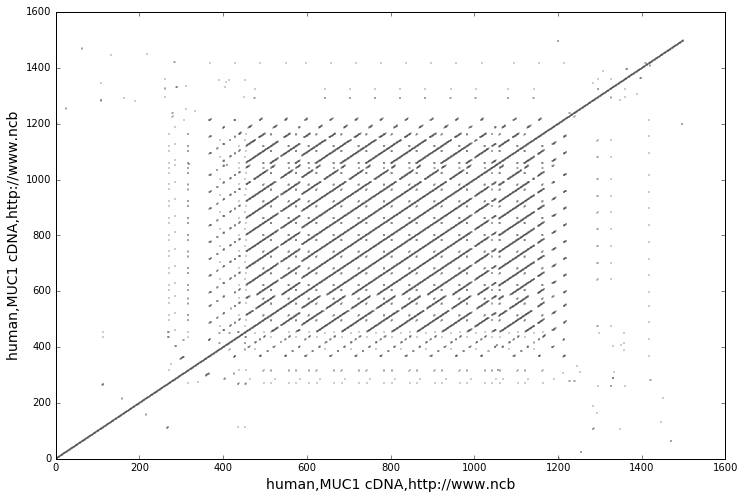

In [146]:
dot_plot('NG_029383.1.middle.fasta','NG_029383.1.middle.fasta',10)

## Textbook Problem 3-2

![](./screenshot 3-2.jpg)

## Textbook Problem 3-3

![](./screenshot 3-3.jpg)